In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
Root = "/content/drive/My Drive/Colab_Notebooks/Music_Genre_Classification"
os.chdir(Root)

In [ ]:
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
audio_dataset_path = '/content/drive/My Drive/Colab_Notebooks/Music_Genre_Classification/archive/Data/genres_original'
metadata = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Music_Genre_Classification/archive/Data/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
    mfcc_scaled_features = np.mean(mfccs_features.T,axis = 0)
    return mfcc_scaled_features

In [ ]:
metadata.drop(labels = 552, axis = 0, inplace = True)

In [ ]:
from tqdm import tqdm
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    try:
        final_class_labels = row["label"]
        file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/', str(row["filename"]))
        data = features_extractor(file_name)
        extracted_features.append([data,final_class_labels])
    except Exception as e:
        print(f"Error: {e}")
        continue

553it [04:01,  2.60it/s]<ipython-input-5-9914fb52cdc2>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
554it [04:02,  1.76it/s]

Error: 


999it [06:53,  2.41it/s]


In [ ]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
extracted_features_df.head()

,feature,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-207.52383, 123.98514, 8.947019, 35.86715, 2....",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855282, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [ ]:
extracted_features_df['class'].value_counts()

class
blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          98
Name: count, dtype: int64

In [ ]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(998, 40)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y.shape

(998, 10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-1.04723763e+02,  8.77537155e+01, -3.32488594e+01, ...,
        -2.38248801e+00, -1.36347139e+00, -7.22123563e-01],
       [-2.59909851e+02,  1.23193169e+02, -6.39508581e+00, ...,
        -6.73697710e+00, -3.90829515e+00,  3.18117642e+00],
       [-1.15755066e+02,  6.70791245e+01,  1.88346851e+00, ...,
        -3.43661404e+00, -1.73870683e+00, -4.68738191e-02],
       ...,
       [-1.25020428e+01,  9.13173676e+01, -2.30759563e+01, ...,
        -4.04763937e+00, -1.77685583e+00, -1.75431299e+00],
       [-2.37930984e+01,  8.29835587e+01,  2.32049227e+00, ...,
         1.40550292e+00,  4.16220367e-01, -3.45980115e-02],
       [-9.63196945e+01,  9.09497147e+01, -3.22195396e+01, ...,
        -2.41483903e+00, -1.62698299e-01, -1.84749973e+00]], dtype=float32)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(798, 40)
(200, 40)
(798, 10)
(200, 10)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels = y.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(1024,input_shape=(40,),activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(num_labels,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              41984     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S",t)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.hdf5', verbose=1, save_best_only=True)
start = datetime.now()
history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks = checkpointer, verbose = 1)
duration= datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 4.4661 - accuracy: 0.0977
Epoch 1: val_loss improved from inf to 2.28582, saving model to saved_models/audio_classification_02:36:16.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 7s 71ms/step - loss: 4.4661 - accuracy: 0.0977 - val_loss: 2.2858 - val_accuracy: 0.1300
Epoch 2/100
24/25 [===========================>..] - ETA: 0s - loss: 2.5972 - accuracy: 0.1094
Epoch 2: val_loss did not improve from 2.28582
25/25 [==============================] - 1s 25ms/step - loss: 2.5952 - accuracy: 0.1078 - val_loss: 2.2893 - val_accuracy: 0.1350
Epoch 3/100
24/25 [===========================>..] - ETA: 0s - loss: 2.3855 - accuracy: 0.1367
Epoch 3: val_loss improved from 2.28582 to 2.25904, saving model to saved_models/audio_classification_02:36:16.hdf5
25/25 [==============================] - 1s 30ms/step - loss: 2.3803 - accuracy: 0.1416 - val_loss: 2.2590 - val_accuracy: 0.1100
Epoch 4/100
23/25 [==========================>...] - ETA: 0s - loss: 2.3237 - accuracy: 0.1332
Epoch 4: val_loss did not improve from 2.25904
25/25 [==============================] - 0s 19ms/step - loss: 2.3223 - accuracy: 0.1316 - val_loss: 2.2681 - val_ac

In [ ]:
model.evaluate(X_test, y_test, verbose = 0)

[1.8962419033050537, 0.6100000143051147]

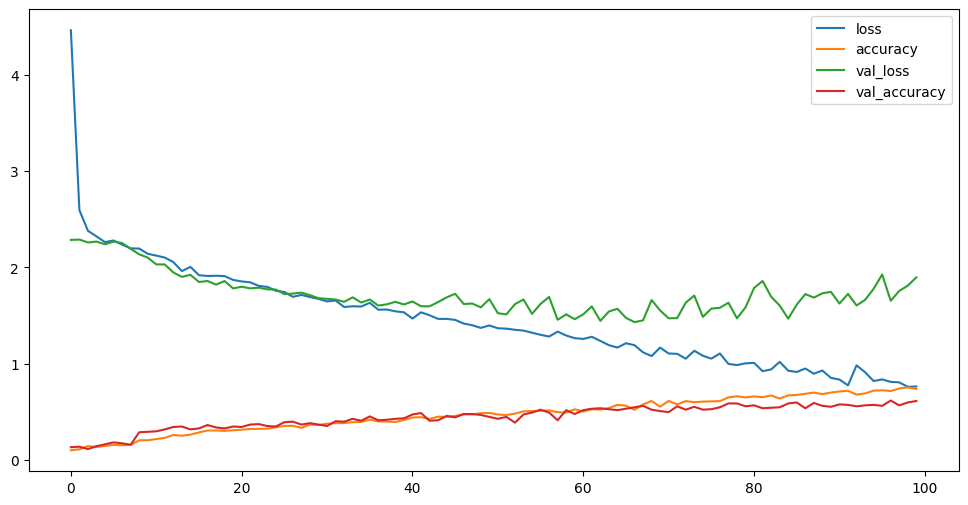

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [ ]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

7/7 [==============================] - 0s 4ms/step


In [ ]:
filename = '/content/drive/My Drive/Colab_Notebooks/Music_Genre_Classification/archive/Data/genres_original/metal/metal.00000.wav'
audio, sample_rate = librosa.load(filename, res_type = 'kaiser fast')
mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probabilities, axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-52.940304    50.09013    -11.491269    46.324932     6.543001
  10.116378     5.4855285    8.844899     5.929942     6.625154
  -4.033035     9.778293    -3.1172316    3.653597    -6.502194
   1.0854731   -4.482196     4.709674    -2.755327     0.4985645
  -9.29338      2.0262656   -3.4876702    2.5047514   -4.658039
  -1.8967493   -5.6836166   -3.1856866   -4.818261     0.85869867
  -5.7388225   -0.4105425   -5.2758536    0.46732435  -0.60271835
  -0.6577608   -2.4302607    1.9490244   -4.047967    -2.844565  ]
[[-52.940304    50.09013    -11.491269    46.324932     6.543001
   10.116378     5.4855285    8.844899     5.929942     6.625154
   -4.033035     9.778293    -3.1172316    3.653597    -6.502194
    1.0854731   -4.482196     4.709674    -2.755327     0.4985645
   -9.29338      2.0262656   -3.4876702    2.5047514   -4.658039
   -1.8967493   -5.6836166   -3.1856866   -4.818261     0.85869867
   -5.7388225   -0.4105425   -5.2758536    0.46732435  -0.60271835
   -0.6577608   -2.4

array(['metal'], dtype='<U9')

In [ ]:
filename = '/content/drive/My Drive/Colab_Notebooks/Music_Genre_Classification/archive/Data/genres_original/classical/classical.00000.wav'
audio, sample_rate = librosa.load(filename, res_type = 'kaiser fast')
mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probabilities, axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-2.6821857e+02  1.3568166e+02 -3.4056377e+01  2.5616009e+01
 -1.2971723e+01  1.7903263e+01 -9.9908600e+00  5.6340880e+00
 -1.4143673e+01  7.4931846e+00 -3.9764395e+00  8.2583084e+00
 -1.3336010e+00 -3.5799497e-01  1.0361007e+00  3.7968225e+00
 -3.1847075e-01  1.7730546e+00  8.8872147e-01 -8.3507770e-01
 -2.3076394e+00  1.6423588e-01  4.2131853e+00  6.9724411e-01
 -1.0828631e+00 -3.4678130e+00  3.2551622e+00 -4.1300349e+00
 -1.1310977e+00  2.3876605e+00  3.7769880e+00 -3.8947053e+00
 -3.3239865e+00 -1.2544751e+00  4.1171589e+00  5.9669650e-01
 -1.8132237e+00 -1.0317802e+00 -1.4721324e+00 -3.8261578e+00]
[[-2.6821857e+02  1.3568166e+02 -3.4056377e+01  2.5616009e+01
  -1.2971723e+01  1.7903263e+01 -9.9908600e+00  5.6340880e+00
  -1.4143673e+01  7.4931846e+00 -3.9764395e+00  8.2583084e+00
  -1.3336010e+00 -3.5799497e-01  1.0361007e+00  3.7968225e+00
  -3.1847075e-01  1.7730546e+00  8.8872147e-01 -8.3507770e-01
  -2.3076394e+00  1.6423588e-01  4.2131853e+00  6.9724411e-01
  -1.0828631e+00 

array(['classical'], dtype='<U9')

In [ ]:
filename = '/content/drive/My Drive/Colab_Notebooks/Music_Genre_Classification/archive/Data/genres_original/blues/blues.00000.wav'
audio, sample_rate = librosa.load(filename, res_type = 'kaiser fast')
mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probabilities, axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-1.1359882e+02  1.2157067e+02 -1.9162262e+01  4.2363941e+01
 -6.3622661e+00  1.8621931e+01 -1.3699734e+01  1.5339802e+01
 -1.2274305e+01  1.0970944e+01 -8.3260612e+00  8.8020878e+00
 -3.6699412e+00  5.7446752e+00 -5.1627831e+00  7.5170648e-01
 -1.6878541e+00 -4.0872991e-01 -2.3026767e+00  1.2224669e+00
 -3.5328746e+00 -1.1397806e+00 -4.2828279e+00 -4.2260838e+00
  9.1518748e-01  9.1406375e-01 -5.7618070e+00 -3.9328036e+00
  1.5094348e+00  2.6984653e+00  5.6560731e+00 -3.2690079e+00
 -2.0606370e-01 -2.9996979e+00  4.4763169e+00 -4.7685507e-01
  6.0062852e+00 -5.9690390e-02 -3.4585848e+00 -1.8418322e+00]
[[-1.1359882e+02  1.2157067e+02 -1.9162262e+01  4.2363941e+01
  -6.3622661e+00  1.8621931e+01 -1.3699734e+01  1.5339802e+01
  -1.2274305e+01  1.0970944e+01 -8.3260612e+00  8.8020878e+00
  -3.6699412e+00  5.7446752e+00 -5.1627831e+00  7.5170648e-01
  -1.6878541e+00 -4.0872991e-01 -2.3026767e+00  1.2224669e+00
  -3.5328746e+00 -1.1397806e+00 -4.2828279e+00 -4.2260838e+00
   9.1518748e-01 

array(['country'], dtype='<U9')